In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.preprocessing import image
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [3]:
image_directory = '/content/drive/MyDrive/FYP_Folder/TrainDataSet'

# Create a list of categories (subdirectories)
categories = os.listdir(image_directory)

# Create empty lists to store image data and labels
X = []
y = []

# Load and preprocess images from categorized subdirectories
for category in categories:
    category_path = os.path.join(image_directory, category)
    # Check if the item is a directory before proceeding
    if os.path.isdir(category_path):
        image_files = os.listdir(category_path)
        for img_file in image_files:
            img_path = os.path.join(category_path, img_file)
            # Check if the item is a file before opening
            if os.path.isfile(img_path):
                print(f"Loading image: {img_path}") # Print the path of each image being loaded
                img = image.load_img(img_path, target_size=(48, 48), grayscale=True)
                img = image.img_to_array(img)
                img /= 255.0
                X.append(img)
                y.append(category)

# Convert labels to numerical values
labels = pd.get_dummies(y)

X = np.array(X)
y = labels.values

# Split data into train and validation sets
X, y = shuffle(X, y, random_state=42)  # Shuffle the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)





Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (107).JPG


/usr/local/lib/python3.10/dist-packages/keras/src/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (112).JPG
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (113).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (110).jpg
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (102).JPG
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (117).JPG
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (118).JPG
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (12).JPG
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_leaf_blight/bacterial_leaf_blight (120).JPG
Loading image: /content/drive/MyDrive/FYP_Folder/TrainDataSet/bacterial_l

In [ ]:
print(f'The No of Sub-directories {len(os.listdir(image_directory))} ')
print()
images = 0
for dir in os.listdir(image_directory):
    subdir_path = os.path.join(image_directory, dir)

    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images inside the Sub-directory {dir}: {num_files}')
        images += num_files
print()
print(f'Totol No of Images {images}')

The No of Sub-directories 6 

The No of Images inside the Sub-directory bacterial_leaf_blight: 438
The No of Images inside the Sub-directory brown_spot: 438
The No of Images inside the Sub-directory healthy: 438
The No of Images inside the Sub-directory leaf_scald: 438
The No of Images inside the Sub-directory narrow_brown_spot: 438
The No of Images inside the Sub-directory leaf_blast: 438

Totol No of Images 2628


In [ ]:
print(f'The No of Sub-directories {len(os.listdir(image_directory))} ') # Use 'image_directory' instead of 'train'
print()
images_train = 0
for dir in os.listdir(image_directory): # Use 'image_directory' instead of 'train'
    subdir_path = os.path.join(image_directory, dir) # Use 'image_directory' instead of 'train'

    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images) * 100 }')
        images_train += num_files
print()
print(f'Totol No of Images {images_train}')

The No of Sub-directories 6 

The No of Images percentage inside the Sub-directory bacterial_leaf_blight: 16.666666666666664
The No of Images percentage inside the Sub-directory brown_spot: 16.666666666666664
The No of Images percentage inside the Sub-directory healthy: 16.666666666666664
The No of Images percentage inside the Sub-directory leaf_scald: 16.666666666666664
The No of Images percentage inside the Sub-directory narrow_brown_spot: 16.666666666666664
The No of Images percentage inside the Sub-directory leaf_blast: 16.666666666666664

Totol No of Images 2628


The No of Sub-directories 6 

The No of Images percentage inside the Sub-directory bacterial_leaf_blight: 16.666666666666664
The No of Images percentage inside the Sub-directory brown_spot: 16.666666666666664
The No of Images percentage inside the Sub-directory healthy: 16.666666666666664
The No of Images percentage inside the Sub-directory leaf_scald: 16.666666666666664
The No of Images percentage inside the Sub-directory narrow_brown_spot: 16.666666666666664
The No of Images percentage inside the Sub-directory leaf_blast: 16.666666666666664

Total No of Images 2628



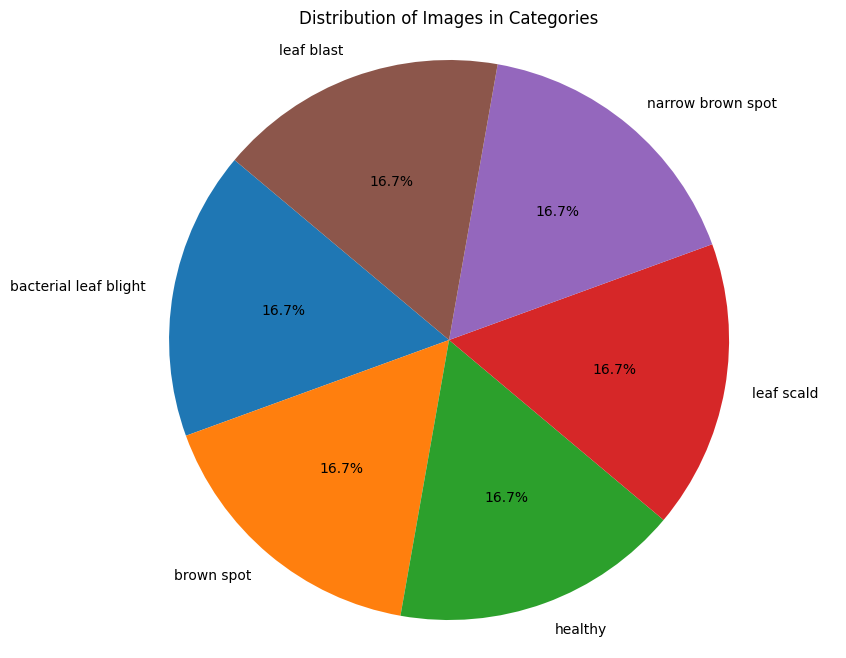

In [ ]:
print(f'The No of Sub-directories {len(os.listdir(image_directory))} ') # Use 'image_directory' instead of 'train'
print()

images = 0
categories = []
percentages = []

for dir in os.listdir(image_directory): # Use 'image_directory' instead of 'train'
    subdir_path = os.path.join(image_directory, dir) # Use 'image_directory' instead of 'train'

    if os.path.isdir(subdir_path):
        num_files = len(os.listdir(subdir_path))
        category_name = dir.replace('_', ' ')  # Optional: Replace underscores with spaces for better display
        categories.append(category_name)
        percentages.append((num_files / 11790) * 100)
        print(f'The No of Images percentage inside the Sub-directory {dir}: {(num_files / images_train) * 100 }')
        images += num_files

print()
print(f'Total No of Images {images}')

# Plotting the data
# Make sure you have imported matplotlib.pyplot as plt
# !pip install matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Images in Categories')
print()
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
print(categories)

['bacterial leaf blight', 'brown spot', 'healthy', 'leaf scald', 'narrow brown spot', 'leaf blast']


In [ ]:
# Define your model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))  # Adjusted input shape to (48, 48, 1)
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(y_train.shape[1], activation='softmax'))  # Output layer with the number of categories

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 50

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_val, y_val))

# Save the model
model.save('model_paddy_micro.h5')



Epoch 1/50
66/66 [==============================] - 36s 528ms/step - loss: 1.6306 - accuracy: 0.2731 - val_loss: 1.3698 - val_accuracy: 0.4411
Epoch 2/50
66/66 [==============================] - 34s 524ms/step - loss: 1.2363 - accuracy: 0.5133 - val_loss: 1.1568 - val_accuracy: 0.5133
Epoch 3/50
66/66 [==============================] - 34s 521ms/step - loss: 1.0378 - accuracy: 0.5961 - val_loss: 1.0615 - val_accuracy: 0.5570
Epoch 4/50
66/66 [==============================] - 36s 536ms/step - loss: 0.8980 - accuracy: 0.6365 - val_loss: 0.9500 - val_accuracy: 0.6236
Epoch 5/50
66/66 [==============================] - 35s 533ms/step - loss: 0.8007 - accuracy: 0.6912 - val_loss: 0.7720 - val_accuracy: 0.7053
Epoch 6/50
66/66 [==============================] - 34s 523ms/step - loss: 0.7134 - accuracy: 0.7293 - val_loss: 0.7598 - val_accuracy: 0.6692
Epoch 7/50
66/66 [==============================] - 35s 525ms/step - loss: 0.6464 - accuracy: 0.7483 - val_loss: 0.7195 - val_accuracy: 0.7053

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
import random

1/1 [==============================] - 0s 198ms/step


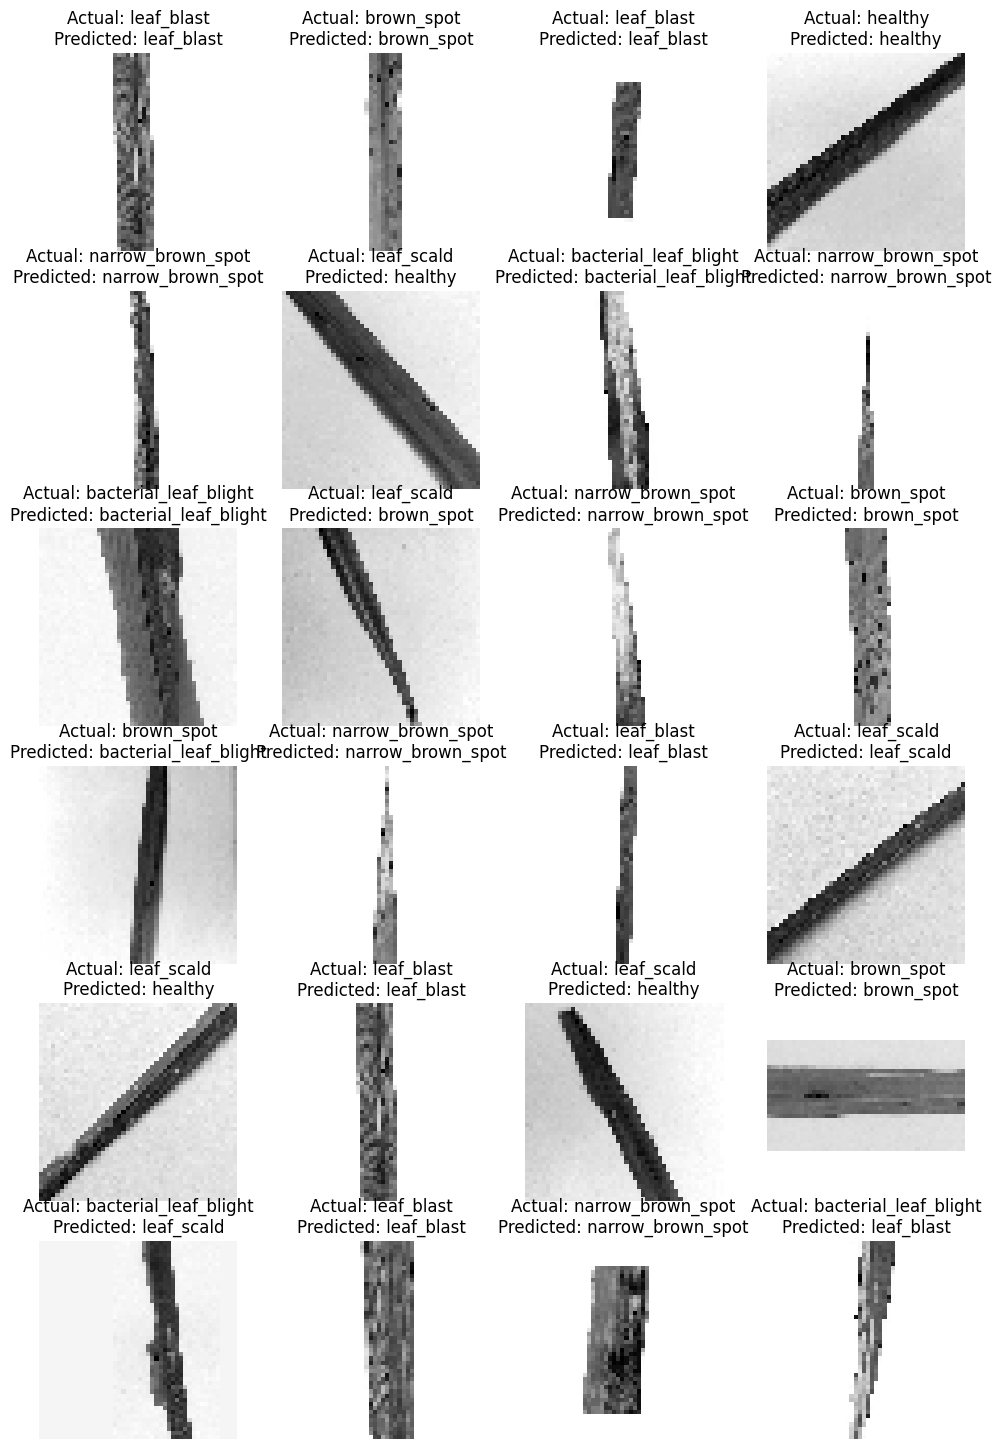

In [ ]:


# Data visualize
sample_size = 24
num_cols = 4
num_rows = sample_size // num_cols


random_indices = random.sample(range(len(X_val)), sample_size)
sample_images = X_val[random_indices]
sample_labels_actual = y_val[random_indices]
sample_labels_predicted = model.predict(sample_images)

# Classes
class_names = ['bacterial_leaf_blight', 'brown_spot', 'healthy', 'leaf_scald', 'narrow_brown_spot', 'leaf_blast']

plt.figure(figsize=(12, 18))
for i in range(sample_size):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(sample_images[i].reshape(48, 48, 1), cmap="gray")
    actual_class_index = np.argmax(sample_labels_actual[i])
    predicted_class_index = np.argmax(sample_labels_predicted[i])
    plt.title(f"Actual: {class_names[actual_class_index]}\nPredicted: {class_names[predicted_class_index]}")
    plt.axis('off')

plt.show()

In [ ]:
# Get predictions
y_pred_probs = model.predict(X_val)  # Probabilities for each class, use X_val instead of val_ds
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted class labels

# True labels (make sure they are in the same format as y_pred)
y_true = np.argmax(y_val, axis=1) # Assuming y_val is one-hot encoded, extract true labels

17/17 [==============================] - 3s 152ms/step


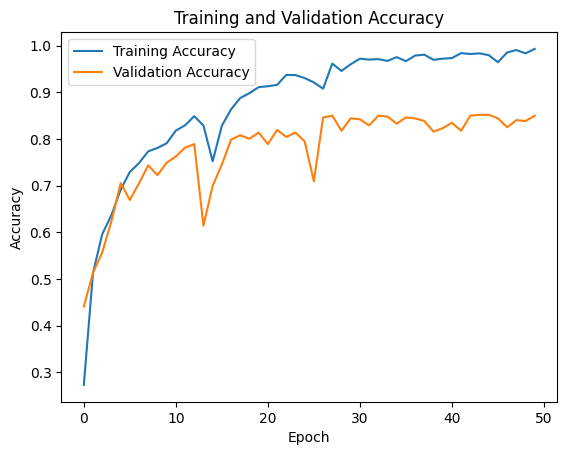

In [ ]:
# Extract training and validation accuracy from history
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Plot the accuracy curves
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')  # Or 'micro', 'weighted'
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8498098859315589
Precision: 0.8563752153036343
Recall: 0.8623969272600114
F1-score: 0.8555103080858607


In [ ]:
# You can visualize the confusion matrix with a heatmap (optional)
import seaborn as sns
import matplotlib.pyplot as plt

Confusion Matrix:
 [[74  1  1  2  2  3]
 [ 1 72  3 21  1  7]
 [ 1  1 73  4  1  0]
 [ 3  6 16 70  2  0]
 [ 0  0  0  2 80  0]
 [ 0  0  0  1  0 78]]


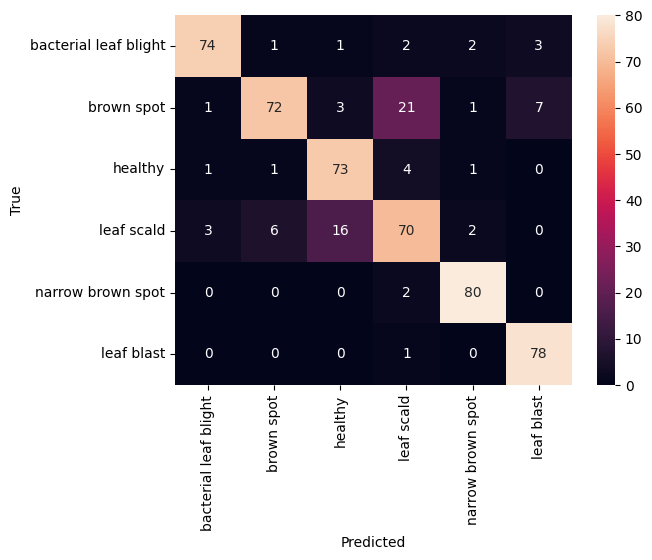

In [ ]:
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", cm)



# Assuming 'disease_names' is a list of disease names corresponding to the classes
disease_names = ['bacterial leaf blight', 'brown spot', 'healthy', 'leaf scald', 'narrow brown spot', 'leaf blast']  # Replace with your actual disease names

sns.heatmap(cm, annot=True, fmt='d', xticklabels=disease_names, yticklabels=disease_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

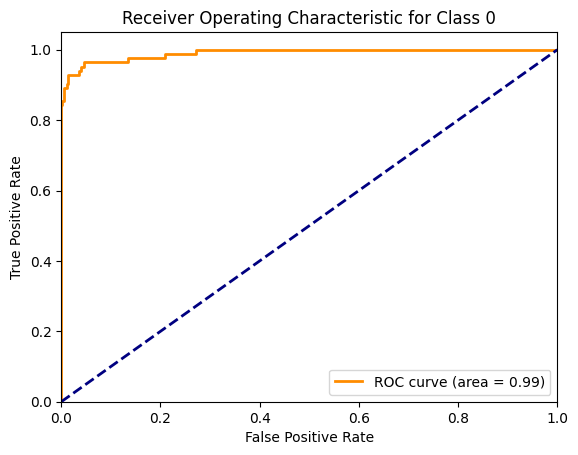

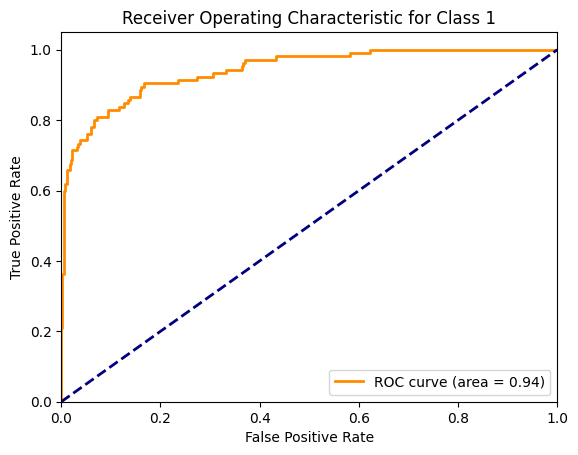

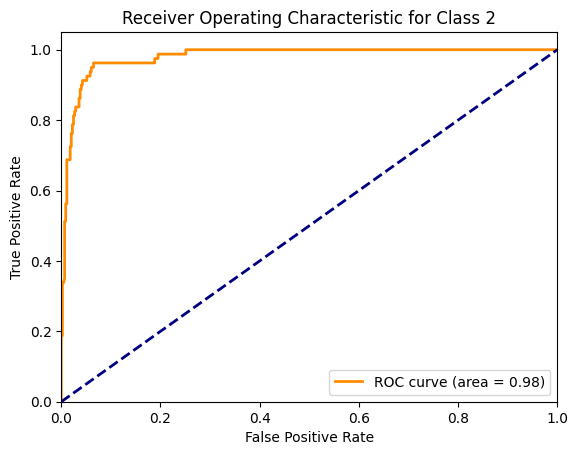

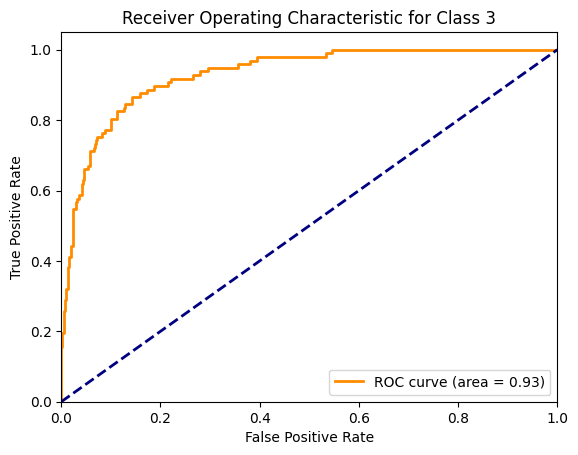

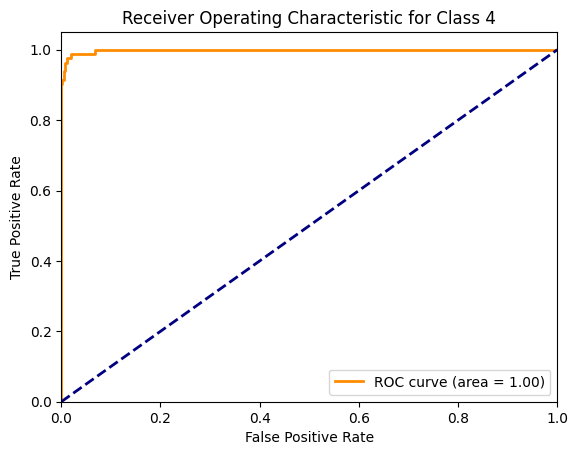

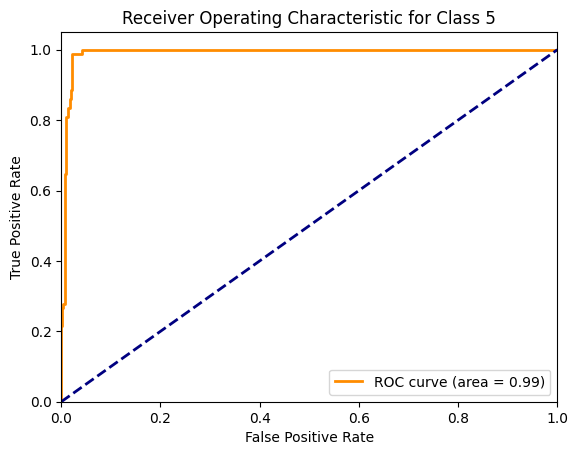

In [ ]:


n_classes = y_pred_probs.shape[1]

for i in range(n_classes):
    # Treat class i as positive, rest as negative
    y_true_binary = (y_true == i).astype(int)
    y_score_binary = y_pred_probs[:, i]

    fpr, tpr, thresholds = roc_curve(y_true_binary, y_score_binary)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic for Class {i}')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
disease_detection_rate = recall  # Same as recall for the positive class
false_alarm_rate = fpr[np.argmax(tpr - fpr)]  # Point on ROC curve closest to top-left corner

print("Disease Detection Rate (Sensitivity):", disease_detection_rate)
print("False Alarm Rate (False Positive Rate):", false_alarm_rate)

Disease Detection Rate (Sensitivity): 0.8623969272600114
False Alarm Rate (False Positive Rate): 0.02237136465324385


In [ ]:
# Example using Stratified K-Fold cross-validation
skf = StratifiedKFold(n_splits=5)  # Adjust n_splits as needed
cv_accuracies = []
cv_precisions = []
# ... (other metrics)

# Make sure X and y_true have the same number of samples for cross-validation
X_cv = X[:len(y_true)]  # Adjust slicing as needed to match y_true length

for train_index, test_index in skf.split(X_cv, y_true):  # Use sliced X
    # ... (Train your model on train_index, evaluate on test_index)
    # ... (Calculate metrics for this fold)
    cv_accuracies.append(accuracy)
    cv_precisions.append(precision)
    # ...

print("Cross-validated Accuracy:", np.mean(cv_accuracies))
print("Cross-validated Precision:", np.mean(cv_precisions))
# ... (Print other cross-validated metrics)

Cross-validated Accuracy: 0.849809885931559
Cross-validated Precision: 0.8563752153036341


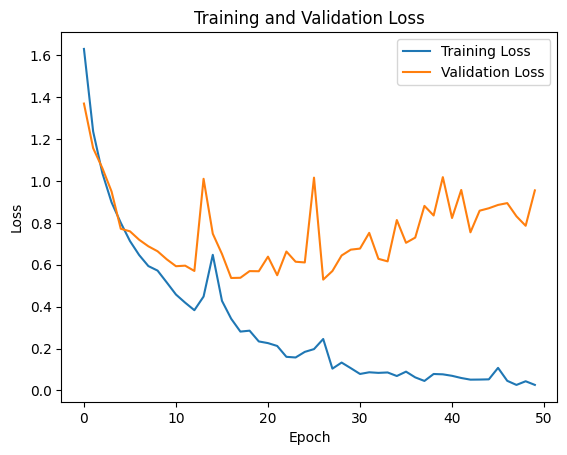

In [ ]:
# Extract training and validation loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
!pip install grad-cam




In [ ]:
from gradcam import GradCAM

# Assuming your model is already defined and trained

# Define GradCAM object for your model's last convolutional layer
gradcam = GradCAM(model, target_layer_name = "conv2d_3")  # Replace with your last convolutional layer name

# Get a sample image from your dataset
sample_image = X_test[0]  # Replace with your desired image index

# Preprocess the image as required by your model
sample_image = preprocess_image(sample_image)  # Implement your preprocessing function

# Generate heatmap
heatmap = gradcam(sample_image, y_pred_class=np.argmax(model.predict(np.expand_dims(sample_image, axis=0))))

# Visualize the heatmap on the original image (code depends on your visualization library)
visualize_heatmap(sample_image, heatmap)  # Implement your visualization function

ModuleNotFoundError: No module named 'gradcam'